# 1. Set up Environment

In [1]:
import scipy
print('scipy: %s' % scipy.__version__)
import numpy
print('numpy: %s' % numpy.__version__)
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import sklearn
print('sklearn: %s' % sklearn.__version__)
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 1.2.1
numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2
statsmodels: 0.10.0


In [2]:
from pandas import read_csv
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv', header=0, index_col=0)

In [3]:
print(series.head())

         Sales
Month         
1964-01   2815
1964-02   2672
1964-03   2755
1964-04   2721
1964-05   2946


# 2. Test Harness

# 2.1 Validation Dataset 

In [4]:
split_point = len(series) - 12
ds, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(ds), len(validation)))
ds.to_csv('ds.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 93, Validation 12


# 2.2 Model Evaluation

# 2.2.1 Performance Measure

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# ...
# test = ...
# predictions = ...
# mse = mean_squared_error(test, predictions)
# rmse = sqrt(mse)
# print('RMSE: %.3f' % rmse)

# 2.2.2 Persistence

In [14]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

In [15]:
history = [x for x in train]
history

[array([2815.], dtype=float32),
 array([2672.], dtype=float32),
 array([2755.], dtype=float32),
 array([2721.], dtype=float32),
 array([2946.], dtype=float32),
 array([3036.], dtype=float32),
 array([2282.], dtype=float32),
 array([2212.], dtype=float32),
 array([2922.], dtype=float32),
 array([4301.], dtype=float32),
 array([5764.], dtype=float32),
 array([7312.], dtype=float32),
 array([2541.], dtype=float32),
 array([2475.], dtype=float32),
 array([3031.], dtype=float32),
 array([3266.], dtype=float32),
 array([3776.], dtype=float32),
 array([3230.], dtype=float32),
 array([3028.], dtype=float32),
 array([1759.], dtype=float32),
 array([3595.], dtype=float32),
 array([4474.], dtype=float32),
 array([6838.], dtype=float32),
 array([8357.], dtype=float32),
 array([3113.], dtype=float32),
 array([3006.], dtype=float32),
 array([4047.], dtype=float32),
 array([3523.], dtype=float32),
 array([3937.], dtype=float32),
 array([3986.], dtype=float32),
 array([3260.], dtype=float32),
 array([

In [16]:
# Walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=4121.000, Expected=4647.000
>Predicted=4647.000, Expected=4753.000
>Predicted=4753.000, Expected=3965.000
>Predicted=3965.000, Expected=1723.000
>Predicted=1723.000, Expected=5048.000
>Predicted=5048.000, Expected=6922.000
>Predicted=6922.000, Expected=9858.000
>Predicted=9858.000, Expected=11331.000
>Predicted=11331.000, Expected=4016.000
>Predicted=4016.000, Expected=3957.000
>Predicted=3957.000, Expected=4510.000
>Predicted=4510.000, Expected=4276.000
>Predicted=4276.000, Expected=4968.000
>Predicted=4968.000, Expected=4677.000
>Predicted=4677.000, Expected=3523.000
>Predicted=3523.000, Expected=1821.000
>Predicted=1821.000, Expected=5222.000
>Predicted=5222.000, Expected=6872.000
>Predicted=6872.000, Expected=10803.000
>Predicted=10803.000, Expected=13916.000
>Predicted=13916.000, Expected=2639.000
>Predicted=2639.000, Expected=2899.000
>Predicted=2899.000, Expected=3370.000
>Predicted=3370.000, Expected=3740.000
>Predicted=3740.000, Expected=2927.000
>Predicted=2927.000

In [19]:
# On average, the persistence model was wrong by about 3,167 million sales for each prediction made.
# This is out baseline model to compare with.

# 3. Data Analysis

In [20]:
# Summary Stats
# Line Plot
# Seasonal Line Plots
# Density Plots
# Box and Whisker Plots

# 3.1 Summary Stats

In [21]:
from pandas import read_csv
series = read_csv('ds.csv')
print(series.describe())

              Sales
count     93.000000
mean    4641.118280
std     2486.403841
min     1573.000000
25%     3036.000000
50%     4016.000000
75%     5048.000000
max    13916.000000


# 3.2 Line Plots

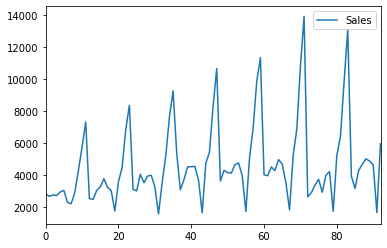

In [23]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('ds.csv')
series.plot()
pyplot.show()

# 3.3 Seasonal Line Plots

In [27]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

series = read_csv('ds.csv')
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i=1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [1964] of <class 'str'>